# Python-1, Лекция 8

Лектор: Хайбулин Даниэль

Подготовил материал: Хайбулин Даниэль

Сегодня мы поговорим о протоколах и интерфейсах в питоне.

## Утиная типизация

<div style="
    background-color: #44944A;
    padding: 15px;
    border-radius: 10px;
    border: 1px solid #fbfbfbff;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        Если оно разговаривает как утка и ходит как утка, то, скорее всего, это утка!
    </span>
</div>

<div style="
    background-color: #44944A;
    padding: 15px;
    border-radius: 10px;
    border: 1px solid #fbfbfbff;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        <strong>Протокол</strong> - неформальный интерфейс, определенный наличием конкретных методов и атрибутов.
    </span>
</div>

Чтобы реализовать пользовательский класс, который будет работать как последовательность, не нужно наследоваться от чего-либо: достаточно реализовать методы, которые прописаны в протоколе последовательности.

Протокол определен лишь в документации, но не в коде.

Пример для понимания:

Протокол последовательность - наличие dunder методов `__len__` и `__getitem__`. Всякий класс, имеющий эти методы со стандартной сигнатурой, может быть использован в том коде, в котором ожидается последовательность.

In [ ]:
import collections
from typing import Self

Card = collections.namedtuple("Card", ["rank", "suit"])


class Deck:
    ranks = [str(n) for n in range(2, 11)] + list("JQKA")
    suits = "spades diamonds clubs hearts".split()

    def __init__(self) -> Self:
        self._cards = [Card(rank, suit) for suit in self.suits for rank in self.ranks]

    def __len__(self) -> int:
        return len(self._cards)

    def __getitem__(self, position: int) -> Card:
        return self._cards[position]


Посмотрев на этот класс мы можем заявить, что это последовательность, так как он ведет себя как последовательность. Это и есть утиная типизация.

Теперь мы можем, например, пройтись циклом по нашему классу:

In [ ]:
deck = Deck()
for card in deck:
    print(card)

Заодно наш класс реализует протокол `Sized`, то есть имеет размер: возвращаемое значением метода `__len__`.

In [ ]:
len(deck)

## Monkey patching

<div style="
    background-color: #44944A;
    padding: 15px;
    border-radius: 10px;
    border: 1px solid #fbfbfbff;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        Monkey patching - динамичное изменение модуля, класса или функции в рантайме.
    </span>
</div>

Давайте попробуем разобраться на примере:

In [ ]:
from random import shuffle

numbers = [_ for _ in range(10)]
print(numbers)
shuffle(numbers)
print(numbers)

Теперь хотим перемешать колоду карт:

In [ ]:
deck = Deck()
shuffle(deck)

Видим ошибку, что у нашего класса нет dunder метода `__setitem__`. Проблема в том, что `shuffle` изменяет входную коллекцию in-place, а наш `Deck` реализует протокол неизменяемой последовательности. Давайте расширим `Deck` до изменяемой последовательности:

In [ ]:
def set_card(
    self: Deck, key: int, value: Card
) -> None:  # обратите внимание как я назвал аргументы по сигнатуре
    self._cards[key] = value

In [ ]:
Deck.__setitem__ = (
    set_card  # делаем monkey patching класса, чтобы он реализовывал нужный нам протокол
)
deck = Deck()
shuffle(deck)  # теперь можно перемешать колоду карт!
for card in deck:
    print(card)

Итак, нам удалось перемешать колоду карт, определив новый метод в нашего класса `Deck`.

Выше показан пример динамичный пример протоколов в динамичной утиной типизации. В данном случае нам все равно, есть ли у объекта изначально какие-либо методы, важно лишь одно: к моменту использования где-либо он должен реализовывать конкретный протокол.

## Гусиная типизация

Очередное животное - очередная типизация. Давайте разбираться в чем разница между уткой.

Тут нам пора обуздать абстракцию, а именно: Abstract Base Class aka `ABC`. Грубо говоря это абстрактные классы, наследуясь от которых мы заявляем, что наш пользовательский класс реализует какой-либо **интерфейс** и распознается функциями `isinstance`, `issubclass`.

Утиная типизация задумана для избежания использования `isinstance` и вообще какой-либо попытки проверить с каким классом мы взаимодействуем.

Но теперь мы поиграемся с `isinstance` для понимания гусиной типизации.

In [ ]:
class MySized:
    def __len__(self) -> int:
        return 0

Теперь нам полезна стандартная библиотека `collections`, в которой есть модуль `abc`.

In [ ]:
from collections import abc

abc.__all__

И теперь через `isinstance` мы проверяем, реализовывает ли инстанс класса некоторый интерфейс, например `Sized`:

In [ ]:
assert isinstance(MySized(), abc.Sized)
assert not isinstance(MySized(), abc.Sequence)

Видим, что инстанс класса `MySized` реализовывает интерфейс `Sized`, но не реализовывает интерфейс последовательности.

Оперируя таким функционалом мы можем строже типизировать наши классы и функции, проверяя соответствие интерфейсу при помощи `isinstance` перед использованием.


<div style="
    background-color: #FFBA00;
    padding: 15px;
    border-left: 5px solid #ffcc00;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        Часто встречающийся isinstance в коде - пример плохо организованного кода.
    </span>
</div>

Кроме того, люди полюбили питон за его динамичность и практичность, поэтому не стоит изобретать новые абстрактные классы, которых нет в `collections.abc`.

## Наследование от ABC

Вернемся к примеру с колодой. Реализуем ее по паттерну гусиной типизации:

In [ ]:
from collections import abc


class Deck(
    abc.MutableSequence
):  # Наследуемся от интерфейса изменяемой последовательности.
    ...


In [ ]:
try:
    deck = Deck()
except TypeError as err:
    print(f"Не удается создать инстанс класса: {err}")

Что мы проделали тут? Мы заявили, что наш пользовательский класс `Deck` реализовывает интерфейс изменяемой последовательности, но мы не реализовали dunder методы, которые определяют изменяемую последовательность. Именно поэтому мы и не можем создать инстанс класса.

<div style="
    background-color: #8B0000;
    padding: 15px;
    border: 2px dashed #ba0606;
    border-radius: 5px;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 20px;
">
<span style="color: white; font-weight: bold;">
        Проверка типов произошла только во время рантайма - когда пытались создать инстанс класса.
    </span>
</div>

Ну что ж, давайте тогда реализуем их:

In [ ]:
from collections import abc, namedtuple
from typing import Self

Card = namedtuple("Card", ["rank", "suit"])


class Deck(abc.MutableSequence):
    ranks = [str(n) for n in range(2, 11)] + list("JQKA")
    suits = "spades diamonds clubs hearts".split()

    def __init__(self) -> Self:
        self._cards = [Card(rank, suit) for suit in self.suits for rank in self.ranks]

    def __len__(self) -> int:
        return len(self._cards)

    def __getitem__(self, position: int) -> Card:
        return self._cards[position]

    def __setitem__(self, position: int, value: Card) -> None:
        self._cards[position] = value

    def __delitem__(self, position: int) -> None:
        del self._cards[position]

    def insert(
        self, position: int, value: Card
    ):  # тут у нас не dunder метод, но тоже заявлен в интерфейсе MutableSequence
        self._cards.insert(position, value)


In [ ]:
deck = Deck()
shuffle(deck)
for card in deck:
    print(card.rank, card.suit)

Теперь мы честно унаследовали наш класс от абстрактного интерфейса и реализовали этот интерфейс.

Ниже показана иерархия наследования абстрактных классов:

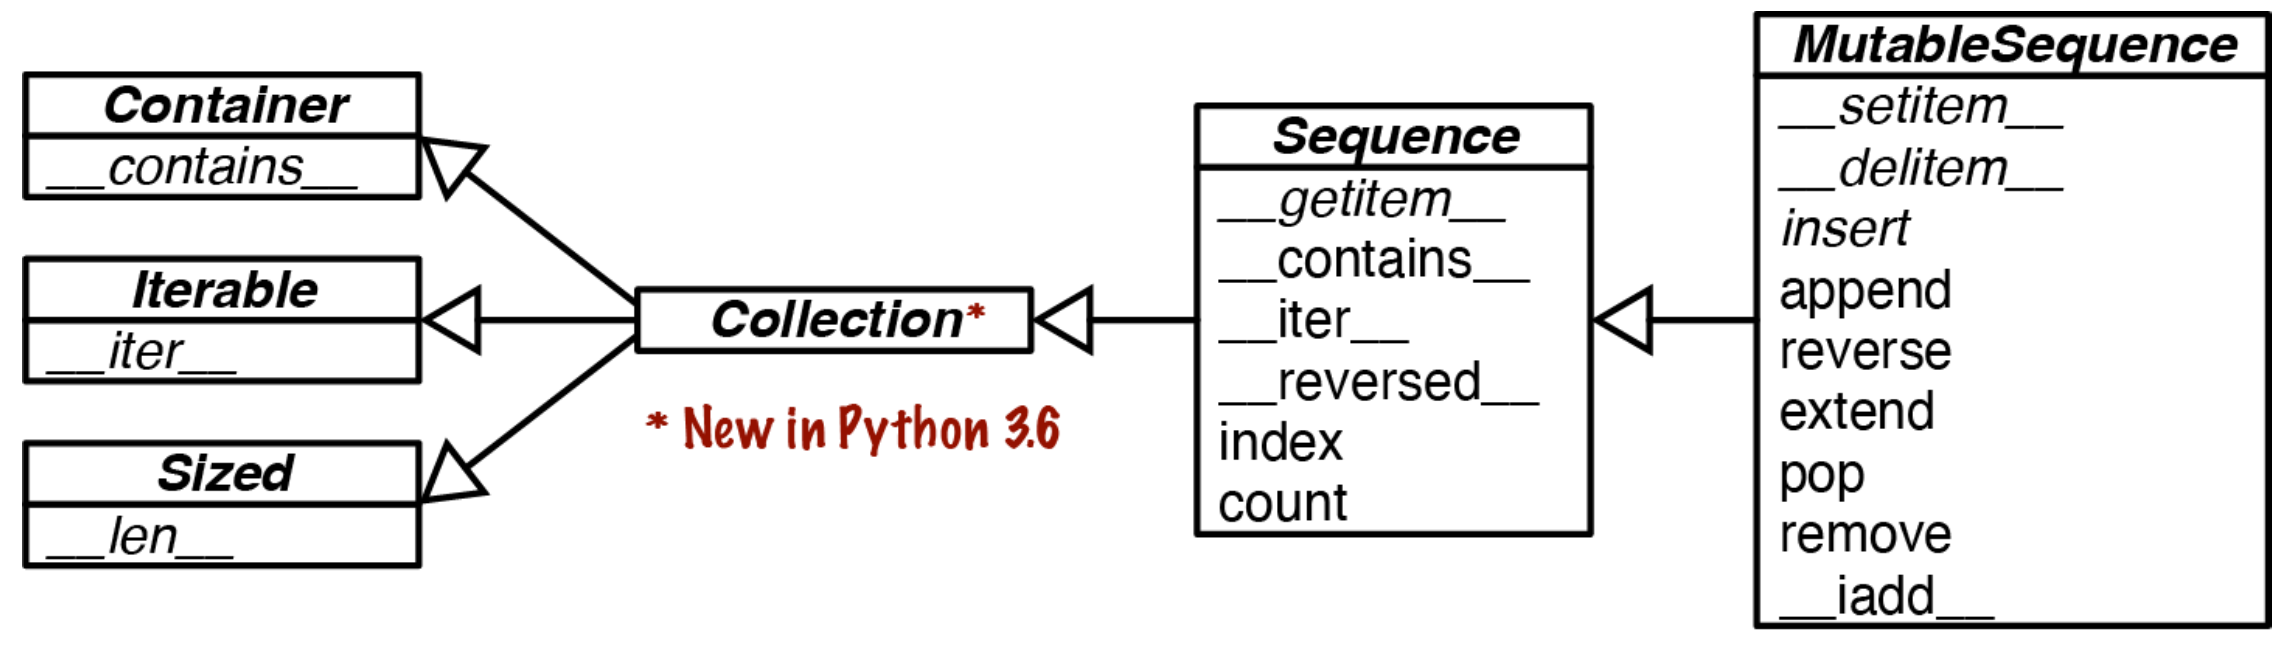

В нашем примере нам не нужны методы `insert` и `__delitem__` - мы проделали лишнюю работу, реализовав их. Однако к этой работе нас обязывает наследование от абстрактного класса. 

Все же, это наследование и награждает нас, от `Sequence` мы получаем следующие методы в подарок:

- `__contains__`
- `__iter__`
- `__reversed__`
- index
- count

In [ ]:
deck = Deck()

assert (
    deck.index(Card(rank="J", suit="spades")) == 9
)  # можем получить индекс конкретной карты
assert (
    deck.count(Card(rank="J", suit="spades")) == 1
)  # можем посчитать оставшееся количество карт в колоде
assert deck.count(Card(rank="F", suit="spades")) == 0
assert (
    Card(rank="J", suit="spades") in deck
)  # можем проверить содержится ли карта в колоде

for card in reversed(deck):  # можем развернуть колоду
    print(card.rank, card.suit)

От `MutableSequence` мы получаем методы `append`, `reverse`, `extend`, `pop`, `remove`, `__iadd__`

Возникает разумный вопрос, а как это вообще работает? Откуда наследуемые методы знают куда, например, сделать `append`?

На самом деле **append** делает что-то в духе:

```python
def append(self, value):
    self.insert(len(self), value)
```

но `insert` мы реализовали сами - это и есть магическое переиспользование того, что мы сделали, в самой функциональности языка.

А вот полная картинка наследования абстрактных базовых классов:

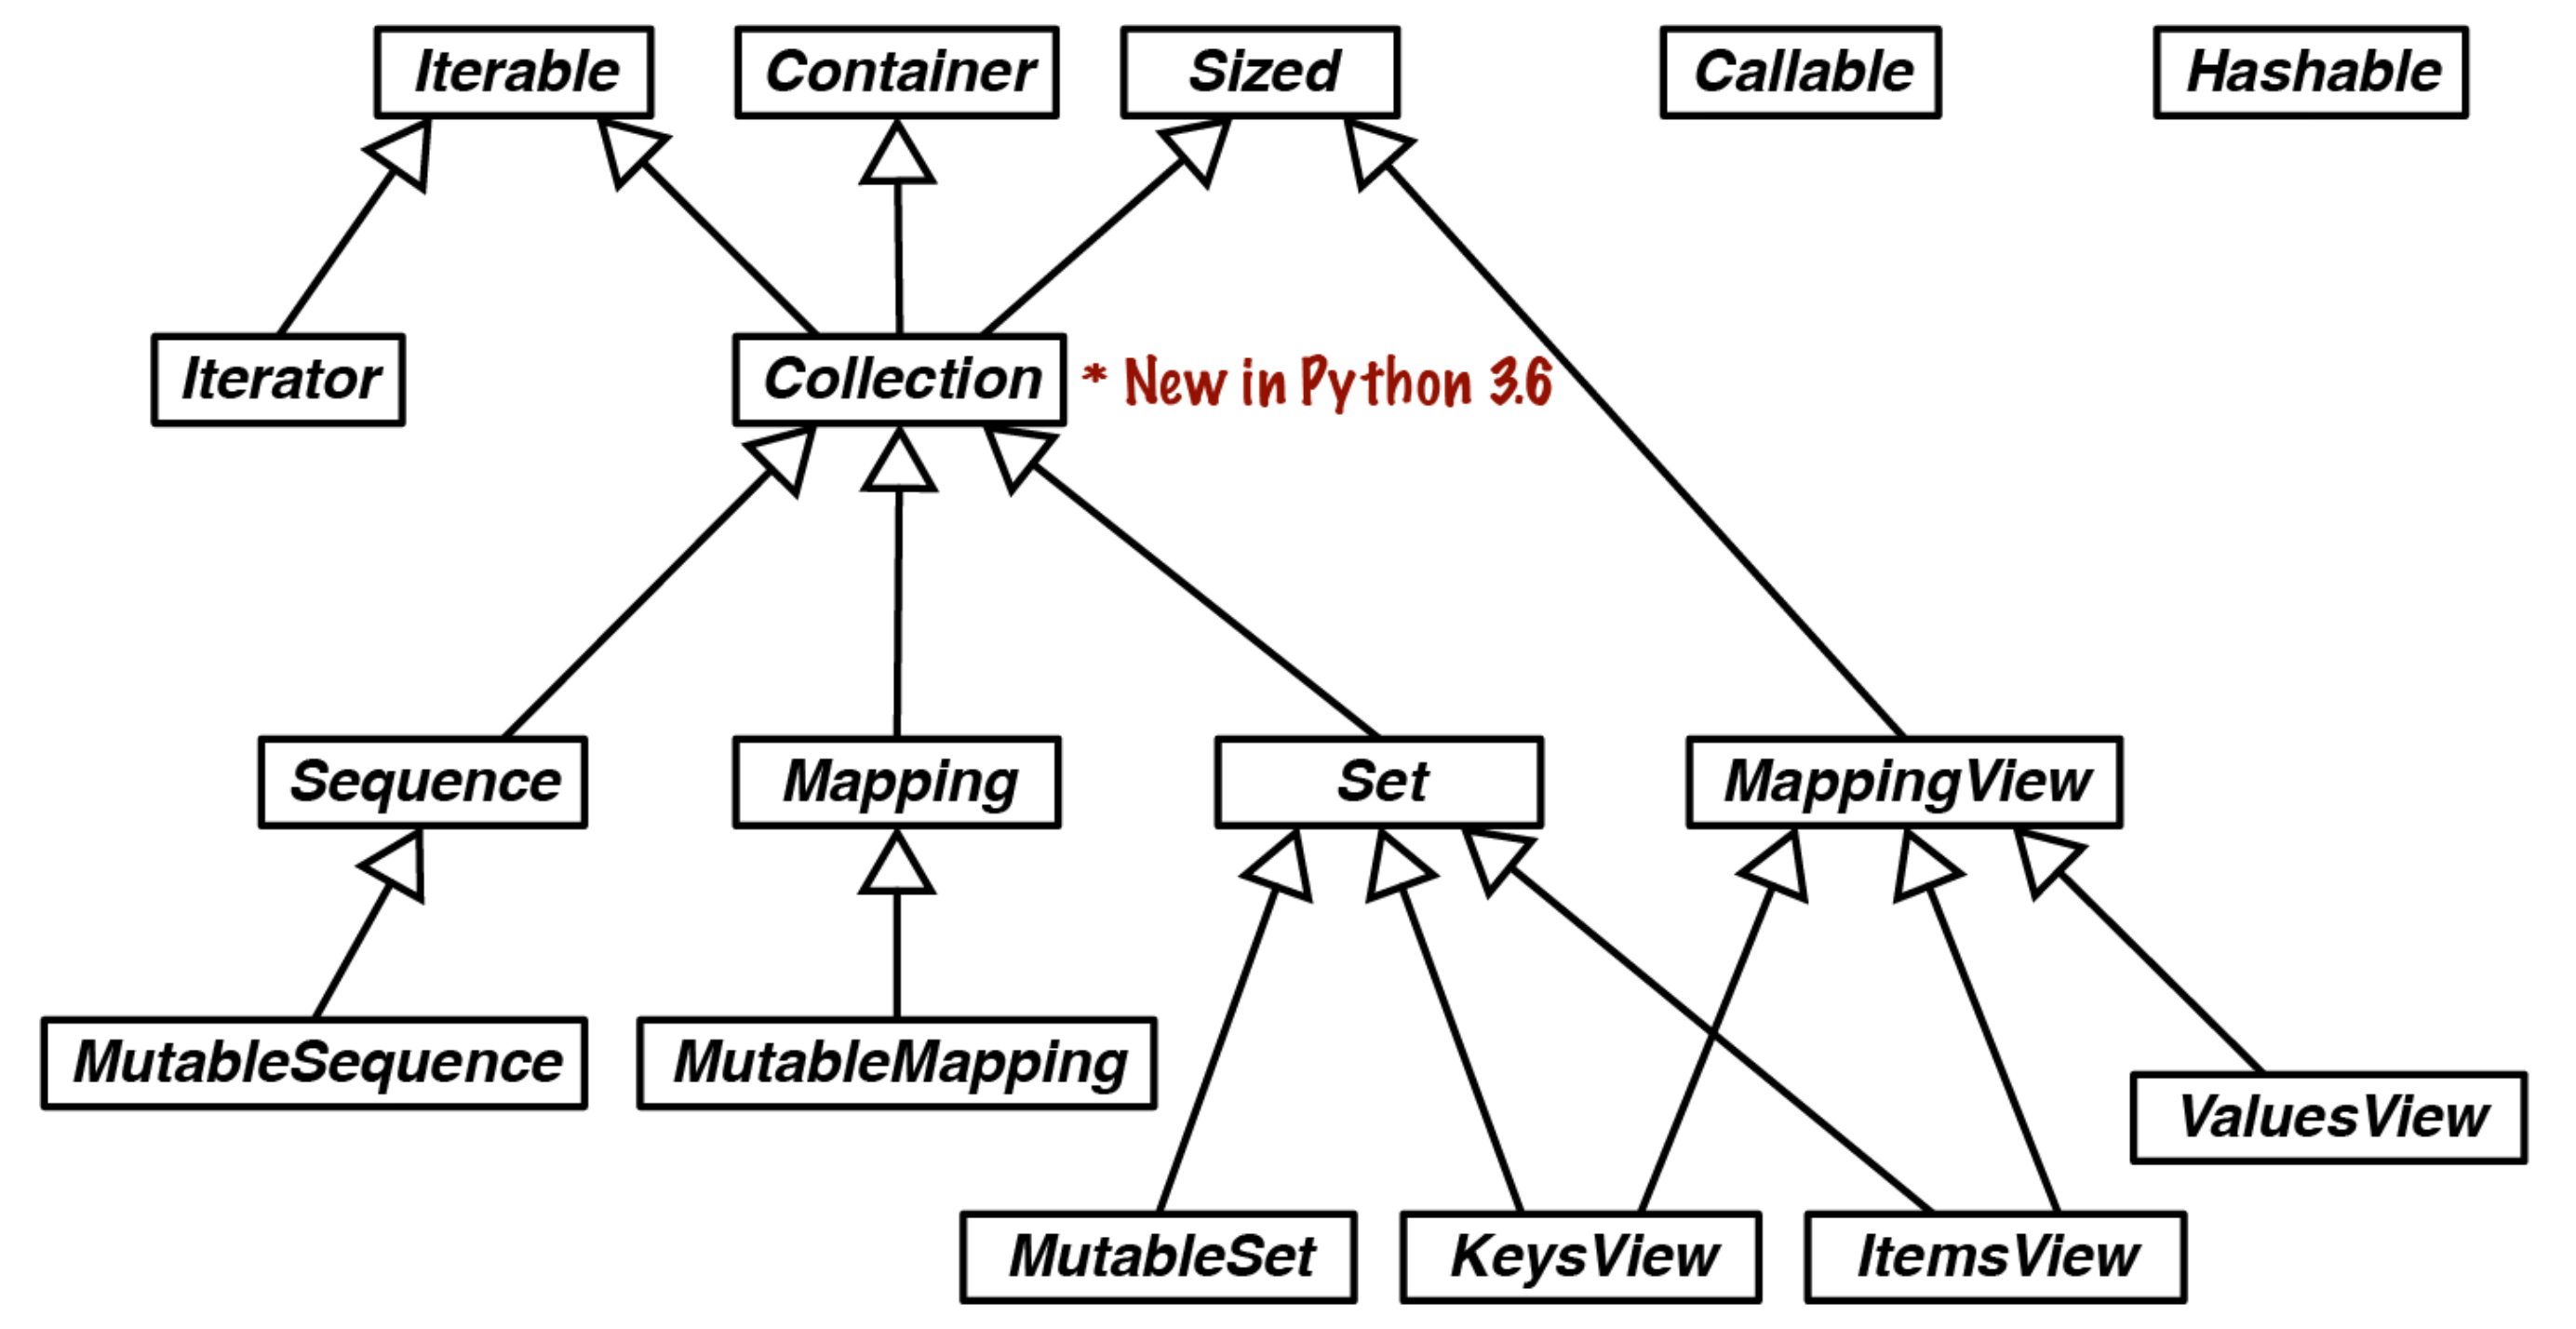

<div style="
    background-color: #8B0000;
    padding: 15px;
    border: 2px dashed #ba0606;
    border-radius: 5px;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 20px;
">
<span style="color: white; font-weight: bold;">
        isinstance не гарантирует проверку хешируемости объекта
    </span>
</div>

С хешируемостью дела обстоят не так прозрачно как хотелось бы: проверяется лишь реализация dunder методов у класса, но не проверяется их реализация у вложенных классов. Простой знакомый нам пример:

In [ ]:
t = (1, 2, [3, 4])
assert isinstance(t, abc.Hashable)

Проверка на `isinstance` пройдена и невнимательный программист получил бы ошибки в дальнейшем, понадеявшись, что входной объект хешируемый, но мы знаем, что он нехешируемый.

<div style="
    background-color: #44944A;
    padding: 15px;
    border-radius: 10px;
    border: 1px solid #fbfbfbff;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        fast fail - чем быстрее код упадет тем лучше.
    </span>
</div>

**Fast Fail** - это история о том, что лучше бы сломать код как можно быстрее. Все же самый лучший способ узнать хешируемый объект или нет - это просто вызвать от него функцию `hash`, как и гласит нам утиная типизация.

In [ ]:
try:
    hash(t)
except TypeError as err:
    print(err)

## Реализация пользовательского ABC

Вот мы разобрались с разными птичьими типизациями, наследованием от абстрактных базовых классов. Давайте теперь реализуем свой абстрактный базовый класс. В этом нам поможет наследование от `abc.ABC`. Напишем класс `Tombola` (лоттерея).

In [ ]:
import abc


class Tombola(abc.ABC):
    @abc.abstractmethod
    def load(self, iterable):
        """Добавить сущности из итерируемого объекта."""

    @abc.abstractmethod
    def pick(self):
        """Случайно удаляет сущность, возвращая ее.

        Этот метод должен пробрасывать `LookupError` когда инстанс пустой.
        """

    def loaded(self):
        """Возвращает `True` если есть хотя бы одна сущность, иначе `False`."""
        return bool(self.inspect())

    def inspect(self):
        """Возвращает отсортированный кортеж хранящихся сущностей."""
        items = []
        while True:
            try:
                items.append(self.pick())
            except LookupError:
                break
        self.load(items)
        return tuple(items)

Мы помечаем метод при помощи `abc.abstractmethod` чтобы показать, что этот метод нужно определить в классе-ребенке. Также мы наследуем ребенку 2 конкретно определенных метода: `loaded` и `inspect`, которые тоже можно переопределять. Код `inspect` не очень умный, но видно, что он полагается на реализованные в детях `pick` и `load`.

<div style="
    background-color: #44944A;
    padding: 15px;
    border-radius: 10px;
    border: 1px solid #fbfbfbff;
    text-align: center;
    display: flex;
    justify-content: center;
    align-items: center;
    min-height: 15px;
">
    <span style="color: white; font-weight: bold;">
        Абстрактный метод всегда должен быть переопределен в классе-ребенке.
    </span>
</div>

In [ ]:
class Fake(Tombola): ...


try:
    Fake()
except TypeError:
    print("Класс не реализовывает интерфейс лоттереи")

Данный пример показывает как валидировать пользовательские классы при помощи пользовательского абстрактного класса. Это и есть **интерфейсы**.

## Структурная типизация и статичные протоколы

Типизация при помощи абстрактных классов - номинальная типизация. Наследуя от абстрактного класса мы ставим пометку об этом, после чего `issubclass` смотрит на эту пометку и говорит, является ли класс подклассом некоторой абстракци или нет.

Есть иной подход - **структурная типизация**. В данном случае мы смотрим на публичный интерфейс класса и проверяем есть ли в нем интересующие нас методы.

In [ ]:
class Struggle:
    def __len__(self) -> int: ...

In [ ]:
from collections import abc

assert isinstance(Struggle(), abc.Sized)
assert issubclass(Struggle, abc.Sized)

`issubclass` посчитал класс `Struggle` подклассом абстрактного класса `Sized`, потому что в публичном интерфейсе `Struggle` есть метод `__len__`.

Теперь разберемся с статичными протоколами. Посмотрим на интересный пример:

In [ ]:
from typing import Any


def double(x: Any) -> Any:
    return x * 2

In [ ]:
from fractions import Fraction  # дробь

assert double(1.5) == 3
assert double("a") == "aa"
assert double(Fraction(1, 5)) == Fraction(2, 5)

Понятное дело, что наша функция `double` будет работать с инстансом всякого класса, у которого реализован dunder метод `__mul__`, притом реализация должна работать со скаляром.

Сейчас мы еще больше углубимся в типизацию в питоне:

In [ ]:
from typing import TypeVar, Protocol


T = TypeVar("T")  # В других языках это также называется Generic.


class Repeatable(Protocol):
    def __mul__(
        self: T, repeat_count: int
    ) -> T: ...  # Тут мы аннотируем при помощи T, чтобы показать, что метод возвращает тот же тип что и тип класса.


RT = TypeVar(
    "RT", bound=Repeatable
)  # Привязываем этот тип к нашему протоколу Repeatable.


def double(
    x: RT,
) -> RT:  # Тут мы показали, что x может умножаться на целое число
    # и результат этого умножения вернет тот же тип что и тип у x.
    return x * 2

Это пример использования дженериков - продвинутой технологии типизации.